In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

%matplotlib inline

In [2]:
# Lemonade csv
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.columns = df.columns.str.lower()

# Using lemonade.csv dataset and focusing on continuous variables:

## Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [5]:
def lower_outlier_detector(df, column, k=1.5):
    
    
    q1, q3 = df[column].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    lower_bound = q1 - k * iqr
    
    outliers = np.where(df[column] < lower_bound, df[column], 0)
    
    df['outliers'] = outliers
    
    return df


def upper_outlier_detector(df, column, k=1.5):
    
    
    q1, q3 = df[column].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + k * iqr
    
    outliers = np.where(df[column] > upper_bound, df[column], 0)
    
    df['outliers'] = outliers
    
    return df

In [6]:
def k3_lower_outlier_detector(df, column, k=3):
    
    
    q1, q3 = df[column].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    lower_bound = q1 - k * iqr
    
    outliers = np.where(df[column] < lower_bound, df[column], 0)
    
    df['outliers'] = outliers
    
    return df


def k3_upper_outlier_detector(df, column, k=3):
    
    
    q1, q3 = df[column].quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    upper_bound = q3 + k * iqr
    
    outliers = np.where(df[column] > upper_bound, df[column], 0)
    
    df['outliers'] = outliers
    
    return df

In [7]:
df.columns

Index(['date', 'day', 'temperature', 'rainfall', 'flyers', 'price', 'sales'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         365 non-null    object 
 1   day          365 non-null    object 
 2   temperature  365 non-null    float64
 3   rainfall     365 non-null    float64
 4   flyers       365 non-null    int64  
 5   price        365 non-null    float64
 6   sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [9]:
# Tempearture
temp_out = lower_outlier_detector(df, 'temperature')
temp_out[temp_out['outliers'] > 0]

,date,day,temperature,rainfall,flyers,price,sales,outliers
364,12/31/17,Sunday,15.1,2.5,9,0.5,7,15.1


In [10]:
# Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0
outliers,365.0,0.041370,0.790370,0.0,0.00,0.00,0.00,15.1


**Its in winter time, so keep it**

In [11]:
# Rainfall
rain_out = lower_outlier_detector(df, 'rainfall')
rain_out[rain_out['outliers'] == 1]

,date,day,temperature,rainfall,flyers,price,sales,outliers


**NO OUTLIERS**

In [12]:
# Flyers
flyers_out = lower_outlier_detector(df, 'flyers')
flyers_out[flyers_out['outliers'] != 0]


,date,day,temperature,rainfall,flyers,price,sales,outliers
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-38


In [13]:
# Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0
outliers,365.0,-0.104110,1.989011,-38.0,0.00,0.00,0.00,0.0


**Outlier is way out there from Q1. Drop**

In [14]:
# Price
price_out = lower_outlier_detector(df, 'price')
price_out[price_out['outliers'] == 1]

,date,day,temperature,rainfall,flyers,price,sales,outliers


**NO OUTLIERS**

In [15]:
# Sales
sales_out = lower_outlier_detector(df, 'sales')
sales_out[sales_out['outliers'] == 1]

,date,day,temperature,rainfall,flyers,price,sales,outliers


**NO OUTLIERS**

## Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [16]:
df.describe()

,temperature,rainfall,flyers,price,sales,outliers
count,365.000000,365.000000,365.000000,365.0,365.000000,365.0
mean,61.224658,0.825973,40.104110,0.5,27.865753,0.0
std,18.085892,0.273890,13.786445,0.0,30.948132,0.0
min,15.100000,0.400000,-38.000000,0.5,7.000000,0.0
25%,49.700000,0.650000,31.000000,0.5,20.000000,0.0
50%,61.100000,0.740000,39.000000,0.5,25.000000,0.0
75%,71.700000,0.910000,49.000000,0.5,30.000000,0.0
max,212.000000,2.500000,80.000000,0.5,534.000000,0.0


In [17]:
# Temperature
temp_out = upper_outlier_detector(df, 'temperature')
temp_out[temp_out['outliers'] != 0]


,date,day,temperature,rainfall,flyers,price,sales,outliers
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,212.0


**With that temperature, life on earth as we know it would be over. Drop it**

In [18]:
df.describe()

,temperature,rainfall,flyers,price,sales,outliers
count,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753,0.580822
std,18.085892,0.273890,13.786445,0.0,30.948132,11.096587
min,15.100000,0.400000,-38.000000,0.5,7.000000,0.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000,0.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000,0.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000,0.000000
max,212.000000,2.500000,80.000000,0.5,534.000000,212.000000


<AxesSubplot:xlabel='temperature'>

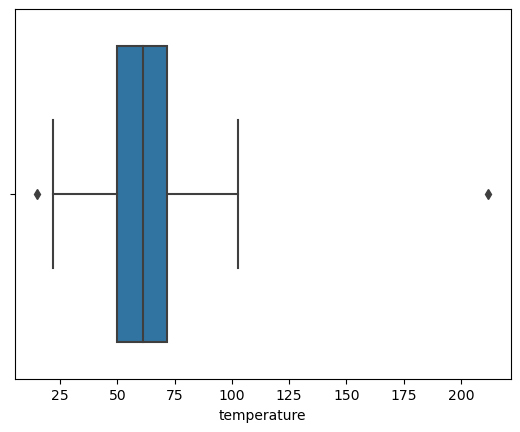

In [19]:
sns.boxplot(x='temperature', data=temp_out)

In [20]:
df.date = pd.to_datetime(df.date)

In [21]:
df.date = df.date.dt.strftime("%m/%d/%Y")

In [22]:
# Rainfall
rain_upper = upper_outlier_detector(df, 'rainfall')
rain_upper[rain_upper['outliers'] != 0].sort_values(['date','outliers'])


,date,day,temperature,rainfall,flyers,price,sales,outliers
0,01/01/2017,Sunday,27.0,2.00,15,0.5,10,2.00
1,01/02/2017,Monday,28.9,1.33,15,0.5,13,1.33
2,01/03/2017,Tuesday,34.5,1.33,27,0.5,15,1.33
5,01/06/2017,Friday,25.3,1.54,23,0.5,11,1.54
6,01/07/2017,Saturday,32.9,1.54,19,0.5,13,1.54
10,01/11/2017,Wednesday,32.6,1.54,23,0.5,12,1.54
11,01/12/2017,Thursday,38.2,1.33,16,0.5,14,1.33
12,01/13/2017,Friday,37.5,1.33,19,0.5,15,1.33
15,01/16/2017,Monday,30.6,1.67,24,0.5,12,1.67
16,01/17/2017,Tuesday,32.2,1.43,26,0.5,14,1.43


**Remove 2.0 and 2.5. They are more than 25% mor than the avg of the outliers.**

In [23]:
# Flyers
flyers_upper = upper_outlier_detector(df, 'flyers')
flyers_upper[flyers_upper['outliers'] != 0].sort_values(['date','outliers'])


,date,day,temperature,rainfall,flyers,price,sales,outliers
166,06/16/2017,Friday,99.3,0.47,77,0.5,41,77
194,07/14/2017,Friday,92.0,0.50,80,0.5,40,80


In [24]:
df.describe()

,temperature,rainfall,flyers,price,sales,outliers
count,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753,0.430137
std,18.085892,0.273890,13.786445,0.0,30.948132,5.803908
min,15.100000,0.400000,-38.000000,0.5,7.000000,0.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000,0.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000,0.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000,0.000000
max,212.000000,2.500000,80.000000,0.5,534.000000,80.000000


<AxesSubplot:xlabel='flyers'>

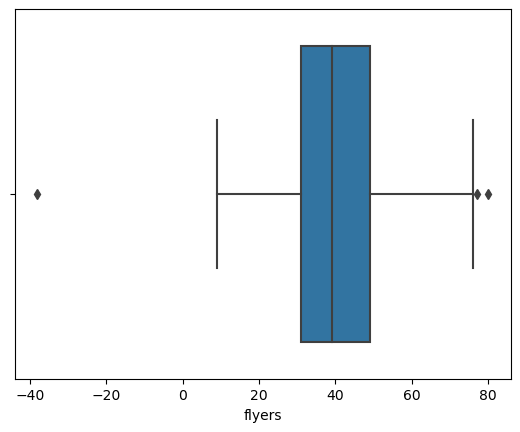

In [25]:
sns.boxplot(x='flyers', data=flyers_upper)

**Drop them**

In [26]:
# Price
price_upper = upper_outlier_detector(df, 'price')
price_upper[price_upper['outliers'] != 0].sort_values(['date','outliers'])


,date,day,temperature,rainfall,flyers,price,sales,outliers


In [27]:
# Sales
sales_upper = upper_outlier_detector(df, 'sales')
sales_upper[sales_upper['outliers'] != 0].sort_values(['date','outliers'])

,date,day,temperature,rainfall,flyers,price,sales,outliers
181,07/01/2017,Saturday,102.9,0.47,59,0.5,143,143
182,07/02/2017,Sunday,93.4,0.51,68,0.5,158,158
183,07/03/2017,Monday,81.5,0.54,68,0.5,235,235
184,07/04/2017,Tuesday,84.2,0.59,49,0.5,534,534


In [28]:
df.describe()

,temperature,rainfall,flyers,price,sales,outliers
count,365.000000,365.000000,365.000000,365.0,365.000000,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753,2.931507
std,18.085892,0.273890,13.786445,0.0,30.948132,32.423083
min,15.100000,0.400000,-38.000000,0.5,7.000000,0.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000,0.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000,0.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000,0.000000
max,212.000000,2.500000,80.000000,0.5,534.000000,534.000000


**Drop 235 and 534. Its summer, but that many sales on a Mon and Tue seems sketch.**

## Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


In [29]:
# Temperature
temp_out = k3_lower_outlier_detector(df, 'temperature')
temp_out[temp_out['outliers'] != 0]

,date,day,temperature,rainfall,flyers,price,sales,outliers


In [30]:
# Rainfall
rain_out = k3_lower_outlier_detector(df, 'rainfall')
rain_out[rain_out['outliers'] != 0]

,date,day,temperature,rainfall,flyers,price,sales,outliers


In [31]:
# Flyers
flyers_out = k3_lower_outlier_detector(df, 'flyers')
flyers_out[flyers_out['outliers'] != 0]


,date,day,temperature,rainfall,flyers,price,sales,outliers
324,11/21/2017,Tuesday,47.0,0.95,-38,0.5,20,-38


**Drop it, how do you get negative flyers?**

In [32]:
# Price
price_out = k3_lower_outlier_detector(df, 'price')
price_out[price_out['outliers'] != 0]

,date,day,temperature,rainfall,flyers,price,sales,outliers


In [33]:
# Sales
sales_out = k3_lower_outlier_detector(df, 'sales')
sales_out[sales_out['outliers'] != 0]

,date,day,temperature,rainfall,flyers,price,sales,outliers


## Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [34]:
# Temperature
temp_out = k3_upper_outlier_detector(df, 'temperature')
temp_out[temp_out['outliers'] != 0]

,date,day,temperature,rainfall,flyers,price,sales,outliers
41,02/11/2017,Saturday,212.0,0.91,35,0.5,21,212.0


**drop it. too hot**

In [35]:
# Rainfall
rain_out = k3_upper_outlier_detector(df, 'rainfall')
rain_out[rain_out['outliers'] != 0]

,date,day,temperature,rainfall,flyers,price,sales,outliers
0,01/01/2017,Sunday,27.0,2.00,15,0.5,10,2.00
338,12/05/2017,Tuesday,22.0,1.82,11,0.5,10,1.82
343,12/10/2017,Sunday,31.3,1.82,15,0.5,11,1.82
364,12/31/2017,Sunday,15.1,2.50,9,0.5,7,2.50


<AxesSubplot:xlabel='rainfall'>

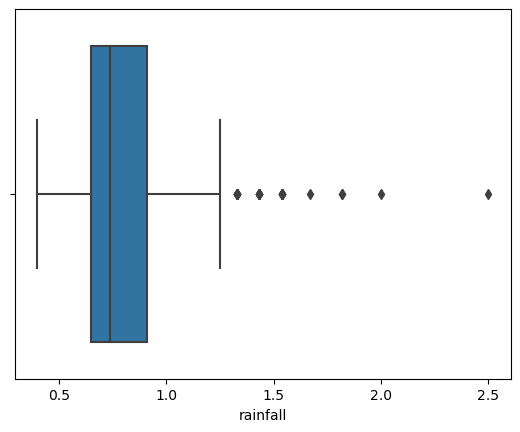

In [36]:
sns.boxplot(x='rainfall', data=rain_out)

**Drop them**

In [37]:
# Price
price_out = k3_upper_outlier_detector(df, 'price')
price_out[price_out['outliers'] != 0]

,date,day,temperature,rainfall,flyers,price,sales,outliers


In [38]:
# Sales
sales_out = k3_upper_outlier_detector(df, 'sales')
sales_out[sales_out['outliers'] != 0]

,date,day,temperature,rainfall,flyers,price,sales,outliers
181,07/01/2017,Saturday,102.9,0.47,59,0.5,143,143
182,07/02/2017,Sunday,93.4,0.51,68,0.5,158,158
183,07/03/2017,Monday,81.5,0.54,68,0.5,235,235
184,07/04/2017,Tuesday,84.2,0.59,49,0.5,534,534


<AxesSubplot:xlabel='sales'>

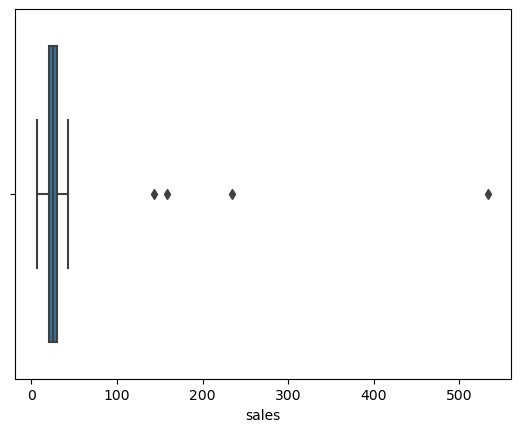

In [39]:
sns.boxplot(x='sales', data=sales_out)

**Drop them. Thats a lot of lemonade. Maybe there is some kind of event going on.**

# Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

In [40]:
df.head(2)

,date,day,temperature,rainfall,flyers,price,sales,outliers
0,01/01/2017,Sunday,27.0,2.00,15,0.5,10,0
1,01/02/2017,Monday,28.9,1.33,15,0.5,13,0


## Use a 2 sigma decision rule to isolate the outliers.

In [41]:
df['temp_zscore'] = stats.zscore(df.temperature)
df['rain_zscore'] = stats.zscore(df.rainfall)
df['flyers_zscore'] = stats.zscore(df.flyers)
df['sales_zscore'] = stats.zscore(df.sales)
df.head()

,date,day,temperature,rainfall,flyers,price,sales,outliers,temp_zscore,rain_zscore,flyers_zscore,sales_zscore
0,01/01/2017,Sunday,27.0,2.00,15,0.5,10,0,-1.894938,4.292372,-1.823427,-0.578073
1,01/02/2017,Monday,28.9,1.33,15,0.5,13,0,-1.789739,1.842779,-1.823427,-0.481003
2,01/03/2017,Tuesday,34.5,1.33,27,0.5,15,0,-1.479680,1.842779,-0.951812,-0.416291
3,01/04/2017,Wednesday,44.1,1.05,28,0.5,17,0,-0.948151,0.819069,-0.879177,-0.351578
4,01/05/2017,Thursday,42.4,1.00,33,0.5,18,0,-1.042276,0.636263,-0.516004,-0.319221


### Temps at 2 std dev

In [42]:
# Temps more than 2 std. dev.
df[df['temp_zscore'] >= 2]

,date,day,temperature,rainfall,flyers,price,sales,outliers,temp_zscore,rain_zscore,flyers_zscore,sales_zscore
41,02/11/2017,Saturday,212.0,0.91,35,0.5,21,0,8.348071,0.307213,-0.370735,-0.222152
166,06/16/2017,Friday,99.3,0.47,77,0.5,41,0,2.108141,-1.301475,2.679918,0.424978
176,06/26/2017,Monday,102.6,0.47,60,0.5,42,0,2.290854,-1.301475,1.445130,0.457334
181,07/01/2017,Saturday,102.9,0.47,59,0.5,143,143,2.307464,-1.301475,1.372495,3.725339
190,07/10/2017,Monday,98.0,0.49,66,0.5,40,0,2.036163,-1.228352,1.880937,0.392622
198,07/18/2017,Tuesday,99.3,0.47,76,0.5,41,0,2.108141,-1.301475,2.607283,0.424978
202,07/22/2017,Saturday,99.6,0.47,49,0.5,42,0,2.124751,-1.301475,0.646149,0.457334
207,07/27/2017,Thursday,97.9,0.47,74,0.5,43,0,2.030626,-1.301475,2.462014,0.489691


### Rainfall at 2 std dev

In [43]:
# Rainfall for std dev
df[df['rain_zscore'] >= 2]

,date,day,temperature,rainfall,flyers,price,sales,outliers,temp_zscore,rain_zscore,flyers_zscore,sales_zscore
0,01/01/2017,Sunday,27.0,2.00,15,0.5,10,0,-1.894938,4.292372,-1.823427,-0.578073
5,01/06/2017,Friday,25.3,1.54,23,0.5,11,0,-1.989063,2.610562,-1.242350,-0.545716
6,01/07/2017,Saturday,32.9,1.54,19,0.5,13,0,-1.568269,2.610562,-1.532888,-0.481003
10,01/11/2017,Wednesday,32.6,1.54,23,0.5,12,0,-1.584879,2.610562,-1.242350,-0.513360
15,01/16/2017,Monday,30.6,1.67,24,0.5,12,0,-1.695614,3.085856,-1.169715,-0.513360
16,01/17/2017,Tuesday,32.2,1.43,26,0.5,14,0,-1.607026,2.208390,-1.024446,-0.448647
19,01/20/2017,Friday,31.6,1.43,20,0.5,12,0,-1.640247,2.208390,-1.460254,-0.513360
23,01/24/2017,Tuesday,28.6,1.54,20,0.5,12,0,-1.806349,2.610562,-1.460254,-0.513360
337,12/04/2017,Monday,34.9,1.54,16,0.5,13,0,-1.457533,2.610562,-1.750792,-0.481003
338,12/05/2017,Tuesday,22.0,1.82,11,0.5,10,0,-2.171776,3.634273,-2.113965,-0.578073


### Flyers at 2 std dev

In [44]:
# Flyers for std dev
df[df['flyers_zscore'] >= 2]

,date,day,temperature,rainfall,flyers,price,sales,outliers,temp_zscore,rain_zscore,flyers_zscore,sales_zscore
166,06/16/2017,Friday,99.3,0.47,77,0.5,41,0,2.108141,-1.301475,2.679918,0.424978
170,06/20/2017,Tuesday,85.1,0.54,70,0.5,37,0,1.321921,-1.045547,2.171476,0.295552
171,06/21/2017,Wednesday,94.3,0.47,76,0.5,41,0,1.831303,-1.301475,2.607283,0.424978
182,07/02/2017,Sunday,93.4,0.51,68,0.5,158,158,1.781472,-1.155230,2.026206,4.210686
183,07/03/2017,Monday,81.5,0.54,68,0.5,235,235,1.122597,-1.045547,2.026206,6.702136
194,07/14/2017,Friday,92.0,0.50,80,0.5,40,0,1.703957,-1.191791,2.897821,0.392622
198,07/18/2017,Tuesday,99.3,0.47,76,0.5,41,0,2.108141,-1.301475,2.607283,0.424978
203,07/23/2017,Sunday,89.1,0.51,72,0.5,37,0,1.543391,-1.155230,2.316745,0.295552
204,07/24/2017,Monday,83.5,0.57,69,0.5,35,0,1.233333,-0.935864,2.098841,0.230839
207,07/27/2017,Thursday,97.9,0.47,74,0.5,43,0,2.030626,-1.301475,2.462014,0.489691


### Sales at 2 std dev

In [45]:
# Sales for std dev
df[df['sales_zscore'] >= 2]

,date,day,temperature,rainfall,flyers,price,sales,outliers,temp_zscore,rain_zscore,flyers_zscore,sales_zscore
181,07/01/2017,Saturday,102.9,0.47,59,0.5,143,143,2.307464,-1.301475,1.372495,3.725339
182,07/02/2017,Sunday,93.4,0.51,68,0.5,158,158,1.781472,-1.155230,2.026206,4.210686
183,07/03/2017,Monday,81.5,0.54,68,0.5,235,235,1.122597,-1.045547,2.026206,6.702136
184,07/04/2017,Tuesday,84.2,0.59,49,0.5,534,534,1.272090,-0.862742,0.646149,16.376724


## Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv



### Temps

In [46]:
# Temps more than 3 std. dev.
df[df['temp_zscore'] >= 3]

,date,day,temperature,rainfall,flyers,price,sales,outliers,temp_zscore,rain_zscore,flyers_zscore,sales_zscore
41,02/11/2017,Saturday,212.0,0.91,35,0.5,21,0,8.348071,0.307213,-0.370735,-0.222152


### Rainfall

In [47]:
# Rainfall more than 3 std. dev.
df[df['rain_zscore'] >= 3]

,date,day,temperature,rainfall,flyers,price,sales,outliers,temp_zscore,rain_zscore,flyers_zscore,sales_zscore
0,01/01/2017,Sunday,27.0,2.00,15,0.5,10,0,-1.894938,4.292372,-1.823427,-0.578073
15,01/16/2017,Monday,30.6,1.67,24,0.5,12,0,-1.695614,3.085856,-1.169715,-0.513360
338,12/05/2017,Tuesday,22.0,1.82,11,0.5,10,0,-2.171776,3.634273,-2.113965,-0.578073
343,12/10/2017,Sunday,31.3,1.82,15,0.5,11,0,-1.656857,3.634273,-1.823427,-0.545716
364,12/31/2017,Sunday,15.1,2.50,9,0.5,7,0,-2.553812,6.120427,-2.259234,-0.675142


### Flyers

In [48]:
# Flyers more than 3 std. dev.
df[df['flyers_zscore'] >= 3]

,date,day,temperature,rainfall,flyers,price,sales,outliers,temp_zscore,rain_zscore,flyers_zscore,sales_zscore


### Sales

In [49]:
# Sales more than 3 std. dev.
df[df['sales_zscore'] >= 3]

,date,day,temperature,rainfall,flyers,price,sales,outliers,temp_zscore,rain_zscore,flyers_zscore,sales_zscore
181,07/01/2017,Saturday,102.9,0.47,59,0.5,143,143,2.307464,-1.301475,1.372495,3.725339
182,07/02/2017,Sunday,93.4,0.51,68,0.5,158,158,1.781472,-1.155230,2.026206,4.210686
183,07/03/2017,Monday,81.5,0.54,68,0.5,235,235,1.122597,-1.045547,2.026206,6.702136
184,07/04/2017,Tuesday,84.2,0.59,49,0.5,534,534,1.272090,-0.862742,0.646149,16.376724
